# General Sar Orbit initialization and basic usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from arepytools.geometry.generalsarorbit import GeneralSarOrbit
from arepytools.timing.precisedatetime import PreciseDateTime

[23-MAY-1998 08:25:12.123456789012 23-MAY-1998 08:26:12.123456789012
 23-MAY-1998 08:27:12.123456789012 23-MAY-1998 08:28:12.123456789012
 23-MAY-1998 08:29:12.123456789012 23-MAY-1998 08:30:12.123456789012
 23-MAY-1998 08:31:12.123456789012 23-MAY-1998 08:32:12.123456789012]


Text(0, 0.5, 'Value of the component [ECEF, m]')

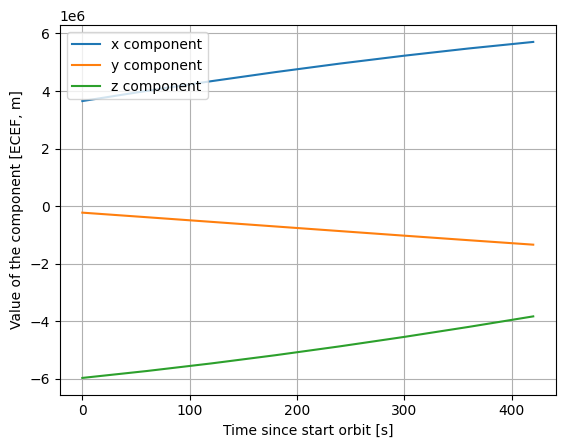

In [2]:
# Time axis and state vectors
time_axis_start = PreciseDateTime.from_utc_string('23-MAY-1998 08:25:12.123456789012345') 
time_axis = np.array([time_axis_start + k*60 for k in range(8)])

state_vectors = np.array([3649827.774, -230395.825, -5977932.035, 4004078.297, -389472.098, -5737992.453, 4340369.951,
                          -549958.828, -5474147.066, 4657295.089, -711027.919, -5187484.967, 4953531.887, -871836.27,
                          -4879190.911, 5227850.084, -1031530.01, -4550540.702, 5479116.359, -1189248.862, -4202896.178,
                          5706299.314, -1344130.6, -3837699.793])
print(time_axis)
time_axis_rel = (time_axis - time_axis_start).astype(float)
plt.plot(time_axis_rel, state_vectors[0::3], label='x component')
plt.plot(time_axis_rel, state_vectors[1::3], label='y component')
plt.plot(time_axis_rel, state_vectors[2::3], label='z component')
plt.grid()
plt.legend()
plt.xlabel('Time since start orbit [s]')
plt.ylabel('Value of the component [ECEF, m]')




## Construct a General Sar Orbit object

In [3]:
orbit = GeneralSarOrbit(time_axis, state_vectors)
print(orbit)


Orbit defined on azimuth axis: 
Axis -- direction: increasing:
-- start: 23-MAY-1998 08:25:12.123456789012, end: 23-MAY-1998 08:32:12.123456789012
-- size: 8, length: 420.0
State vectors: 
[[ 3649827.774  4004078.297  4340369.951  4657295.089  4953531.887
   5227850.084  5479116.359  5706299.314]
 [ -230395.825  -389472.098  -549958.828  -711027.919  -871836.27
  -1031530.01  -1189248.862 -1344130.6  ]
 [-5977932.035 -5737992.453 -5474147.066 -5187484.967 -4879190.911
  -4550540.702 -4202896.178 -3837699.793]]



**Combine it with the io toolbox!**


Replace these steps by parsing an xml file with the [io data toolbox](../../reference/api/io.rst) and pass the state vectors object to the helper function [create_general_sar_orbit()](../../reference/api/geometry.rst#arepytools.geometry.generalsarorbit.create_general_sar_orbit)

## Retrieve the state vectors

Text(0, 0.5, 'Value of the component [ECEF, m]')

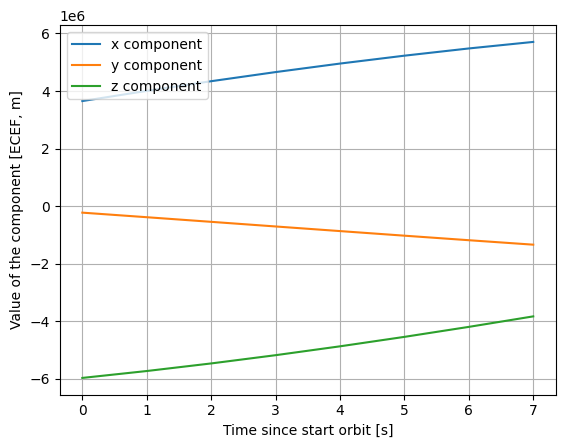

In [4]:
plt.plot(orbit.position_sv[0::3], label='x component')
plt.plot(orbit.position_sv[1::3], label='y component')
plt.plot(orbit.position_sv[2::3], label='z component')
plt.grid()
plt.legend()
plt.xlabel('Time since start orbit [s]')
plt.ylabel('Value of the component [ECEF, m]')

Text(0, 0.5, 'Value of the component [ECEF, m]')

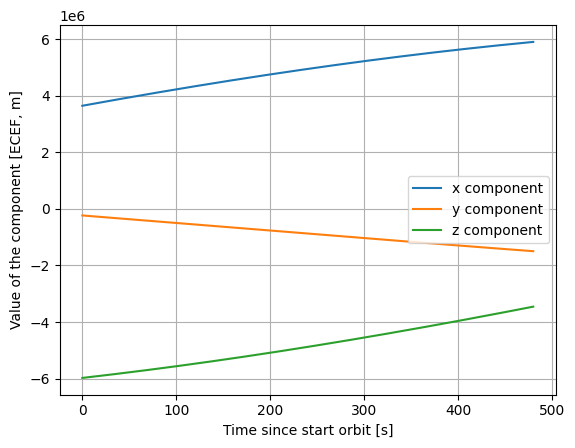

In [5]:
# ... or interpolate them on a list of Azimuth times
time_axis_refined = np.array([time_axis_start + k * 0.1 for k in range(round(8 * 60 / 0.1))])
time_axis_rel = (time_axis_refined - time_axis_start).astype(float)

position_interpolated = orbit.get_position(time_axis_refined)

plt.plot(time_axis_rel, position_interpolated[0, :], label='x component')
plt.plot(time_axis_rel, position_interpolated[1, :], label='y component')
plt.plot(time_axis_rel, position_interpolated[2, :], label='z component')

plt.grid()
plt.legend()
plt.xlabel('Time since start orbit [s]')
plt.ylabel('Value of the component [ECEF, m]')





